In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('outliers_cleaned.csv')

In [37]:
df.drop(columns = ["Unnamed: 0"],inplace = True)

In [38]:
df

,property_type,society,sector,price,persf_area,area,areaWithType,bedroom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.00,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1,...,NaN,900.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,450.000
1,flat,apna enclave,sector 3,0.50,7692.0,650.03,Carpet area: 650 (60.39 sq.m.),2.0,2.0,1,...,NaN,650.0,0.0,0.0,0.0,0.0,0.0,1.0,37.0,325.015
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.06,Carpet area: 595 (55.28 sq.m.),2.0,2.0,3,...,NaN,595.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,297.530
3,flat,smart world orchard,sector 61,1.47,12250.0,1200.00,Carpet area: 1200 (111.48 sq.m.),2.0,2.0,2,...,NaN,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,76.0,600.000
4,flat,parkwood westend,sector 92,0.70,5204.0,1345.12,Super Built up area 1345(124.95 sq.m.),2.0,2.0,3,...,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,672.560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3572,house,independent,sector 57,4.75,28788.0,1650.00,Plot area 1600(148.64 sq.m.)Built Up area: 170...,3.0,3.0,3,...,1700.0,1650.0,0.0,0.0,1.0,0.0,0.0,1.0,96.0,550.000
3573,house,dlf city phase 1,sector 26,5.50,30556.0,1800.00,Plot area 200(167.23 sq.m.),4.0,4.0,3,...,1800.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,69.0,450.000
3574,house,dlf city plots phase 2,sector 25,4.25,31481.0,1350.00,Plot area 150(125.42 sq.m.),3.0,2.0,3,...,1350.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,35.0,450.000
3575,house,dlf city phase 1,sector 26,4.50,33333.0,1350.00,Plot area 150(125.42 sq.m.),3.0,3.0,2,...,1350.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,70.0,450.000


In [39]:
df.shape

(3577, 24)

In [40]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
persf_area                0
area                      0
areaWithType              0
bedroom                   0
bathroom                  0
balcony                  85
floorNum                 17
facing                 1021
agePossession             0
super_built_up_area    1701
built_up_area          1972
carpet_area            1731
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

## built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

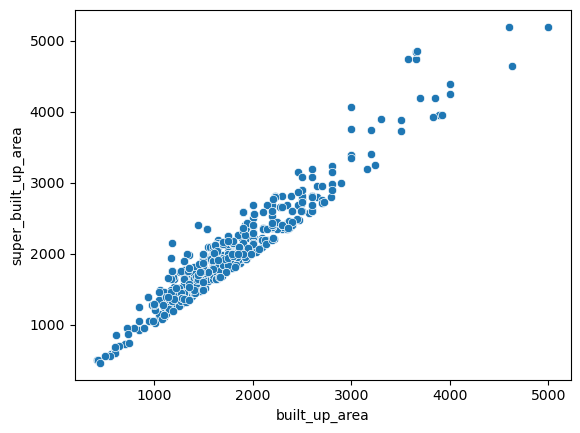

In [41]:
sns.scatterplot(x='built_up_area', y='super_built_up_area', data=df)

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

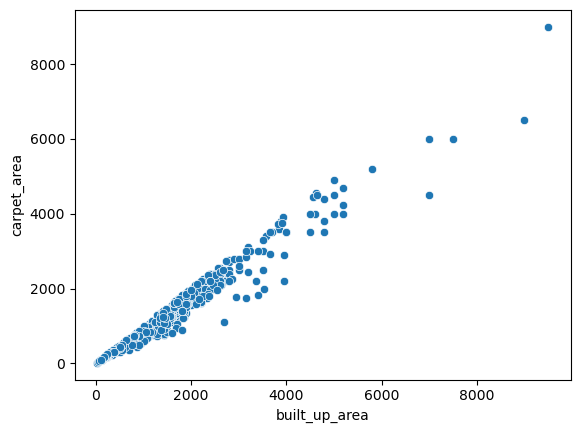

In [42]:
sns.scatterplot(x='built_up_area', y='carpet_area', data=df)

In [43]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3572    False
3573    False
3574    False
3575    False
3576    False
Length: 3577, dtype: bool

In [44]:
all_yes = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [45]:
all_yes.shape

(531, 24)

In [46]:
super_to_built_up_ratio = (all_yes['super_built_up_area']/all_yes['built_up_area']).median()

In [47]:
carpet_to_built_up_ratio = (all_yes['carpet_area']/all_yes['built_up_area']).median()

In [48]:
print(super_to_built_up_ratio) 
print(carpet_to_built_up_ratio)

1.105263157894737
0.9


In [49]:
# carpet,super present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [50]:
sbc_df.head()

,property_type,society,sector,price,persf_area,area,areaWithType,bedroom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
30,flat,bhawna cghs,sector 43,3.25,10156.0,3200.08,Super Built up area 3200(297.29 sq.m.)Carpet a...,4.0,4.0,3+,...,NaN,3000.0,0.0,0.0,0.0,1.0,0.0,1.0,119.0,800.020000
35,flat,chintels paradiso,sector 109,1.80,8866.0,2030.23,Super Built up area 2030(188.59 sq.m.)Carpet a...,3.0,3.0,2,...,NaN,1785.0,0.0,1.0,0.0,0.0,0.0,0.0,83.0,676.743333
36,flat,breez global hill view,sohna road,0.30,5403.0,555.25,Super Built up area 655(60.85 sq.m.)Carpet are...,2.0,2.0,2,...,NaN,555.0,0.0,0.0,0.0,0.0,0.0,0.0,109.0,277.625000
57,flat,silverglades the melia,sohna road,1.01,7000.0,1442.86,Super Built up area 1450(134.71 sq.m.)Carpet a...,2.0,2.0,3,...,NaN,950.0,1.0,0.0,0.0,0.0,0.0,0.0,80.0,721.430000
59,flat,umang winter hills,sector 77,0.99,7857.0,1260.02,Super Built up area 1260(117.06 sq.m.)Carpet a...,2.0,2.0,2,...,NaN,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,630.010000


In [51]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_14284\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [52]:
df.update(sbc_df)

In [53]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
persf_area                0
area                      0
areaWithType              0
bedroom                   0
bathroom                  0
balcony                  85
floorNum                 17
facing                 1021
agePossession             0
super_built_up_area    1701
built_up_area          1551
carpet_area            1731
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [54]:
# super,built present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [55]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_14284\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [56]:
df.update(sb_df)

In [57]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
persf_area                0
area                      0
areaWithType              0
bedroom                   0
bathroom                  0
balcony                  85
floorNum                 17
facing                 1021
agePossession             0
super_built_up_area    1701
built_up_area           675
carpet_area            1731
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [58]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [59]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_14284\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [60]:
df.update(c_df)

In [61]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
persf_area                0
area                      0
areaWithType              0
bedroom                   0
bathroom                  0
balcony                  85
floorNum                 17
facing                 1021
agePossession             0
super_built_up_area    1701
built_up_area             0
carpet_area            1731
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

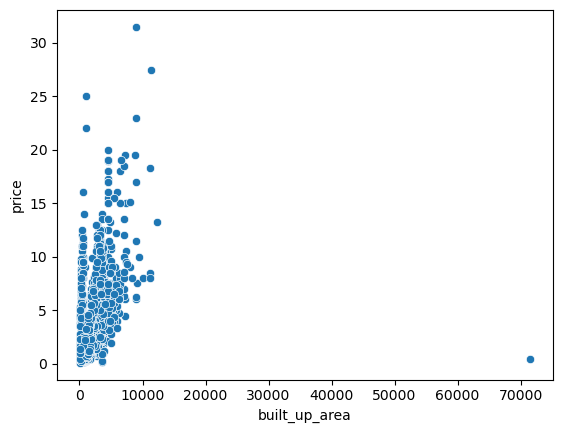

In [65]:
sns.scatterplot(data=df,x='built_up_area',y='price')

In [66]:
deviant = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [67]:
deviant.head()

,price,area,built_up_area
48,2.80,1650.07,1833.0
74,2.70,2159.14,1954.0
80,3.87,2250.00,1712.0
95,2.85,1828.09,1654.0
150,2.80,1866.67,1654.0


In [68]:
deviant['built_up_area'] = deviant['area']

In [69]:
df.update(deviant)

<Axes: xlabel='built_up_area', ylabel='price'>

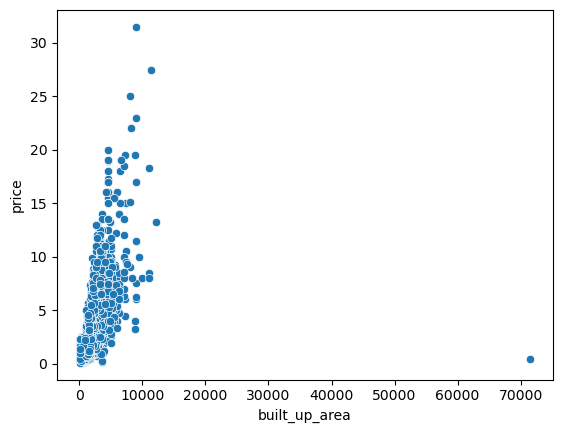

In [70]:
sns.scatterplot(data=df,x='built_up_area',y='price')

In [71]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [72]:
df.head()

,property_type,society,sector,price,persf_area,bedroom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,2.0,2.0,1,4.0,West,Relatively New,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
1,flat,apna enclave,sector 3,0.50,7692.0,2.0,2.0,1,1.0,West,Old Property,722.0,0.0,0.0,0.0,0.0,0.0,1.0,37.0
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,2.0,2.0,3,12.0,NaN,New Property,661.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0
3,flat,smart world orchard,sector 61,1.47,12250.0,2.0,2.0,2,2.0,NaN,Under Construction,1333.0,1.0,0.0,0.0,0.0,0.0,0.0,76.0
4,flat,parkwood westend,sector 92,0.70,5204.0,2.0,2.0,3,5.0,NaN,Under Construction,1217.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
df.isnull().sum()

property_type         0
society               0
sector                0
price                 0
persf_area            0
bedroom               0
bathroom              0
balcony              85
floorNum             17
facing             1021
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

## floornum

In [75]:
df['floorNum'].isnull().sum()

17

In [74]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,persf_area,bedroom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
169,flat,experion heartsong,dwarka expressway,1.08,6150.0,3.0,3.0,NaN,NaN,NaN,Under Construction,1758.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2578,flat,independent,sector 78,0.60,3692.0,2.0,2.0,NaN,NaN,NaN,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2826,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,0.0,1.0,1.0,1.0,0.0,0.0,88.0
2845,house,independent,sector 2,5.60,17284.0,8.0,6.0,3+,NaN,South-West,Moderately Old,3240.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2916,house,independent,sector 24,1.45,2984.0,3.0,3.0,1,NaN,NaN,Old Property,540.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
2948,house,independent,sector 3,1.50,10288.0,3.0,3.0,0,NaN,NaN,Old Property,210.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2963,house,independent,sector 4,4.12,8889.0,2.0,1.0,3+,NaN,NaN,Moderately Old,4635.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3012,house,independent,sector 4,0.65,11111.0,4.0,2.0,2,NaN,NaN,Moderately Old,585.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3028,house,ansal sushant lok plots,sector 43,3.30,26570.0,1.0,1.0,0,NaN,NaN,Under Construction,1242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3150,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [77]:
df['floorNum'].fillna(2.0,inplace=True)

In [78]:
df.isnull().sum()

property_type         0
society               0
sector                0
price                 0
persf_area            0
bedroom               0
bathroom              0
balcony              85
floorNum              0
facing             1021
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

## facing

In [80]:
1011/df.shape[0]*100

28.26390830304725

<Axes: ylabel='facing'>

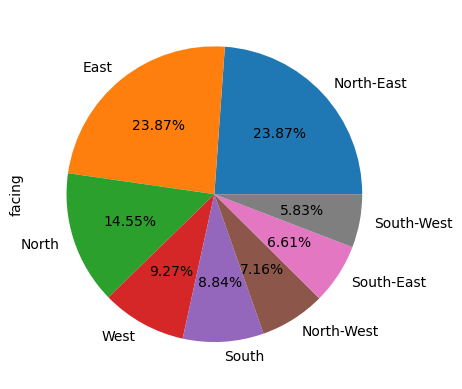

In [81]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [82]:
df.drop(columns=['facing'],inplace=True)

In [83]:
df.isnull().sum()

property_type       0
society             0
sector              0
price               0
persf_area          0
bedroom             0
bathroom            0
balcony            85
floorNum            0
agePossession       0
built_up_area       0
study room          0
servant room        0
store room          0
pooja room          0
others              0
furnishing_type     0
luxury_score        0
dtype: int64

## age possession


In [84]:
df['agePossession'].value_counts()

Relatively New        1610
New Property           561
Moderately Old         551
Old Property           295
Undefined              295
Under Construction     265
Name: agePossession, dtype: int64

In [85]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,persf_area,bedroom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
5,flat,signature global infinity mall,sector 36,0.41,6269.0,2.0,2.0,3,3.0,Undefined,654.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,flat,sobha city,sector 108,3.95,16859.0,4.0,5.0,3,25.0,Undefined,2343.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
16,flat,senate court,sector 62,0.90,14084.0,1.0,1.0,NaN,0.0,Undefined,639.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,flat,the serenas,sector 36,0.42,7910.0,2.0,2.0,1,3.0,Undefined,590.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,flat,m3m golfestate,sector 65,6.15,18331.0,3.0,4.0,2,20.0,Undefined,3355.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,house,independent,sector 108,1.34,5000.0,1.0,1.0,0,1.0,Undefined,2680.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3215,house,independent,sector 39,0.34,7556.0,1.0,1.0,1,1.0,Undefined,450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3216,house,independent,sector 105,9.90,49500.0,2.0,2.0,2,3.0,Undefined,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3218,house,independent,sector 43,2.15,13030.0,1.0,1.0,0,1.0,Undefined,1650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
def impute_mode(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [87]:
df['agePossession'] = df.apply(impute_mode,axis=1)

In [88]:
df['agePossession'].value_counts()

Relatively New        1719
New Property           601
Moderately Old         596
Old Property           328
Under Construction     280
Undefined               53
Name: agePossession, dtype: int64

In [89]:
def impute_mode2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [90]:
df['agePossession'] = df.apply(impute_mode2,axis=1)

In [91]:
df['agePossession'].value_counts()

Relatively New        1728
Moderately Old         603
New Property           602
Old Property           331
Under Construction     280
Undefined               33
Name: agePossession, dtype: int64

In [92]:
def impute_mode3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [93]:
df['agePossession'] = df.apply(impute_mode3,axis=1)

In [94]:
df['agePossession'].value_counts()

Relatively New        1730
Moderately Old         634
New Property           602
Old Property           331
Under Construction     280
Name: agePossession, dtype: int64

In [95]:
df.isnull().sum()

property_type       0
society             0
sector              0
price               0
persf_area          0
bedroom             0
bathroom            0
balcony            85
floorNum            0
agePossession       0
built_up_area       0
study room          0
servant room        0
store room          0
pooja room          0
others              0
furnishing_type     0
luxury_score        0
dtype: int64

In [96]:
df["balcony"].replace(np.nan,"0",inplace = True)

In [97]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
persf_area         0
bedroom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [98]:
df.to_csv('missing_treated.csv',index=False)